In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Data loading

In [0]:
import torchvision
import torchvision.transforms as transforms

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

0it [00:00, ?it/s]

100%|█████████▉| 170369024/170498071 [01:23<00:00, 1636743.32it/s]

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [6]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

print(images[1].shape)
print(labels[1].item())

torch.Size([3, 32, 32])
1


In [7]:
print(images.shape)

torch.Size([4, 3, 32, 32])


# Visualize data

In [8]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [9]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [11]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


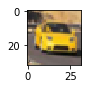

In [12]:
plt.figure(figsize=(1, 1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

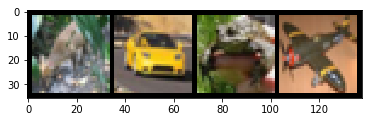

deer car frog plane


In [14]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# single convo layer

In [0]:
import torch.nn as nn

class FCNN(nn.Module):
  
  def __init__(self):
    super(FCNN, self).__init__()
    self.conv1 = nn.Conv2d(3 , 16, 3, padding=(1, 1), stride=(2, 2))
  
  def forward(self, x):
    x = self.conv1(x)
    return x

In [0]:
net = FCNN()

In [17]:
net

FCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)

In [18]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [19]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [20]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


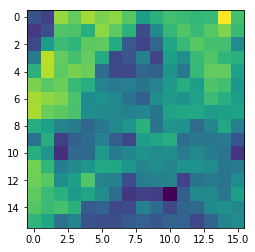

In [21]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

# deep convo net

In [0]:
class FCNN2(nn.Module):
  
  def __init__(self):
    super(FCNN2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 8, 3),
        nn.Conv2d(8, 16, 3)
    )
  
  def forward(self, x):
    x = self.model(x)
    return x

In [24]:
net = FCNN2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

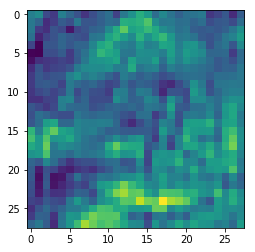

In [25]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FCNN3(nn.Module):
  
  def __init__(self):
    super(FCNN3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.AvgPool2d(2, stride=2)
    )
  
  def forward(self, x):
    x = self.model(x)
    return x

In [29]:
net = FCNN3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

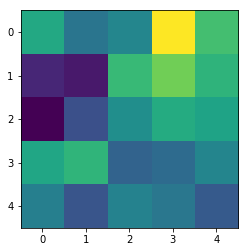

In [30]:
plt.imshow(out[0, 0, :, :].detach().numpy())

# LeNet

In [0]:
class LeNet(nn.Module):
  
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential (
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
  
  def forward(self, x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x = self.fc_model(x)
    print(x.shape)
    return x

In [35]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [36]:
print(out)

tensor([[-0.0534, -0.1168, -0.0737, -0.0213,  0.0288,  0.0254,  0.0274, -0.1370,
         -0.0399,  0.0417],
        [-0.0582, -0.1244, -0.0545, -0.0320,  0.0266,  0.0415,  0.0179, -0.1130,
         -0.0595,  0.0279],
        [-0.0537, -0.1206, -0.0737, -0.0200,  0.0361,  0.0290,  0.0144, -0.1160,
         -0.0583,  0.0361],
        [-0.0559, -0.1166, -0.0695, -0.0189,  0.0165,  0.0362,  0.0166, -0.1212,
         -0.0613,  0.0400]], grad_fn=<AddmmBackward>)


In [37]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([9, 5, 4, 9])


# Training LeNet

In [0]:
class LeNet(nn.Module):
  
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )
  
  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [39]:
batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred==labels).sum().item()
  return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch :  0 /  16, test acc : 42.60, Train acc: 43.09
Epoch :  1 /  16, test acc : 45.07, Train acc: 46.01
Epoch :  2 /  16, test acc : 48.67, Train acc: 49.77
Epoch :  3 /  16, test acc : 49.80, Train acc: 51.33
Epoch :  4 /  16, test acc : 50.79, Train acc: 53.48
Epoch :  5 /  16, test acc : 51.91, Train acc: 55.23
Epoch :  6 /  16, test acc : 52.67, Train acc: 56.68
Epoch :  7 /  16, test acc : 54.69, Train acc: 58.67
Epoch :  8 /  16, test acc : 54.80, Train acc: 59.56
Epoch :  9 /  16, test acc : 54.41, Train acc: 60.74
Epoch :  10 /  16, test acc : 54.63, Train acc: 61.42
Epoch :  11 /  16, test acc : 55.04, Train acc: 62.15
Epoch :  12 /  16, test acc : 54.90, Train acc: 63.26
Epoch :  13 /  16, test acc : 55.54, Train acc: 63.98
Epoch :  14 /  16, test acc : 55.69, Train acc: 65.67
Epoch :  15 /  16, test acc : 55.58, Train acc: 66.26


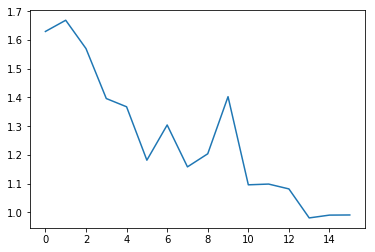

CPU times: user 6min 28s, sys: 7.51 s, total: 6min 36s
Wall time: 6min 37s


In [45]:
%%time

loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
    loss_arr.append(loss.item())
  loss_epoch_arr.append(loss.item())
  print('Epoch : % d / % d, test acc : %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

# using GPU

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def eva(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred==labels).sum().item()
  return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [49]:
%%time

max_epochs=16

for epoch in range(max_epochs):
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    opt.zero_grad()
    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
  print('Epoch : % d / % d, test acc : %0.2f, Train acc: %0.2f' % (epoch, max_epochs, eva(testloader), eva(trainloader)))

Epoch :  0 /  16, test acc : 38.12, Train acc: 38.41
Epoch :  1 /  16, test acc : 42.47, Train acc: 42.95
Epoch :  2 /  16, test acc : 47.16, Train acc: 47.86
Epoch :  3 /  16, test acc : 49.93, Train acc: 50.69
Epoch :  4 /  16, test acc : 50.64, Train acc: 52.01
Epoch :  5 /  16, test acc : 53.38, Train acc: 55.36
Epoch :  6 /  16, test acc : 53.08, Train acc: 55.63
Epoch :  7 /  16, test acc : 54.33, Train acc: 57.86
Epoch :  8 /  16, test acc : 54.15, Train acc: 57.90
Epoch :  9 /  16, test acc : 54.82, Train acc: 60.24
Epoch :  10 /  16, test acc : 55.79, Train acc: 61.10
Epoch :  11 /  16, test acc : 56.17, Train acc: 62.36
Epoch :  12 /  16, test acc : 56.17, Train acc: 63.09
Epoch :  13 /  16, test acc : 55.21, Train acc: 62.92
Epoch :  14 /  16, test acc : 56.21, Train acc: 64.74
Epoch :  15 /  16, test acc : 56.50, Train acc: 65.41
CPU times: user 2min 59s, sys: 3.4 s, total: 3min 3s
Wall time: 3min 3s


# Visualization

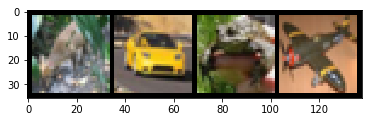

In [51]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [53]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [54]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

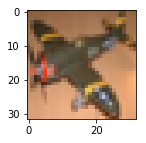

In [55]:
image_id = 3
plt.figure(figsize=(2, 2))
imshow(images[image_id, ])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


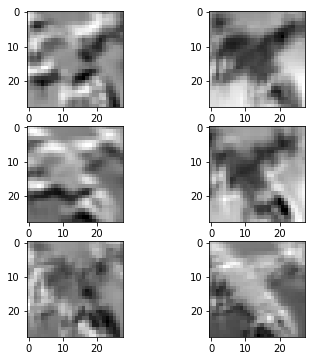

In [56]:
plt.figure(figsize=(6, 6))
plt.subplot(321)
for i in range(6):
  ax1 = plt.subplot(3, 2, i+1)
  plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")